**Nome**: Gustavo Miguel Ferreira da Silva

**Email**: gmfs@cesar.school

Link do dataset: [link text](https://www.kaggle.com/datasets/mloey1/ahcd1)




# Carregando o dataset + alguns manipulaões

In [1]:
import kagglehub
import os
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# Download latest version
path = kagglehub.dataset_download("mloey1/ahcd1")

file_list = os.listdir(path)

print("Files in the dataset directory:")
for file_name in file_list:
    print(file_name)

Using Colab cache for faster access to the 'ahcd1' dataset.
Files in the dataset directory:
Arabic Handwritten Characters Dataset CSV
arabic handwritten characters dataset csv
Train+Test Images Matlab.mat
csvTestLabel 3360x1.csv
Train Images 13440x32x32
train images 13440x32x32
csvTrainImages 13440x1024.csv
Test Images 3360x32x32
test images 3360x32x32
csvTestImages 3360x1024.csv
csvTrainLabel 13440x1.csv


## Buscando os dados de treino

In [2]:
import pandas as pd

# Construct the full paths to the training image and label CSV files
train_images_path = os.path.join(path, 'csvTrainImages 13440x1024.csv')
train_labels_path = os.path.join(path, 'csvTrainLabel 13440x1.csv')

# Load the training images and labels
train_images_df = pd.read_csv(train_images_path)
train_labels_df = pd.read_csv(train_labels_path)

print("Training Images DataFrame head:")
print(train_images_df.head())
print("\nTraining Labels DataFrame head:")
print(train_labels_df.head())

Training Images DataFrame head:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.896  0.897  0.898  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.899  0.900  0.901  0.902  0.903  0.904  0.905  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1024 columns]

Training Labels DataFrame head:
   1
0  1
1  1
2  1
3  1
4  1


**Reasoning**:
To fully load the dataset as per the subtask, I also need to load the test images and labels into Pandas DataFrames, similar to how the training data was loaded. This ensures all relevant CSV data files are loaded into suitable data structures.



## Buscando os dados de teste

In [3]:
import pandas as pd

# Construct the full paths to the test image and label CSV files
test_images_path = os.path.join(path, 'csvTestImages 3360x1024.csv')
test_labels_path = os.path.join(path, 'csvTestLabel 3360x1.csv')

# Load the test images and labels
test_images_df = pd.read_csv(test_images_path)
test_labels_df = pd.read_csv(test_labels_path)

print("Test Images DataFrame head:")
print(test_images_df.head())
print("\nTest Labels DataFrame head:")
print(test_labels_df.head())

Test Images DataFrame head:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.919  0.920  0.921  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.922  0.923  0.924  0.925  0.926  0.927  0.928  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1024 columns]

Test Labels DataFrame head:
   1
0  1
1  2
2  2
3  3
4  3


## Limpando os dados encontrados - checando valores faltantes


In [4]:
print("Missing values in train_images_df:")
print(train_images_df.isnull().sum().sum())

print("\nMissing values in train_labels_df:")
print(train_labels_df.isnull().sum().sum())

print("\nMissing values in test_images_df:")
print(test_images_df.isnull().sum().sum())

print("\nMissing values in test_labels_df:")
print(test_labels_df.isnull().sum().sum())

Missing values in train_images_df:
0

Missing values in train_labels_df:
0

Missing values in test_images_df:
0

Missing values in test_labels_df:
0


Como pode perceber nenhum valor faltante foi encontrado, hora de examinar os tipos de dados de cada coluna



In [5]:
print("\nData types for train_images_df:")
print(train_images_df.info())

print("\nData types for train_labels_df:")
print(train_labels_df.info())

print("\nData types for test_images_df:")
print(test_images_df.info())

print("\nData types for test_labels_df:")
print(test_labels_df.info())


Data types for train_images_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Columns: 1024 entries, 0 to 0.905
dtypes: int64(1024)
memory usage: 105.0 MB
None

Data types for train_labels_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       13439 non-null  int64
dtypes: int64(1)
memory usage: 105.1 KB
None

Data types for test_images_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Columns: 1024 entries, 0 to 0.928
dtypes: int64(1024)
memory usage: 26.2 MB
None

Data types for test_labels_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3359 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB
None


Verificando os intervalos de valores dos pixels



In [6]:
print("Min pixel value in train_images_df:", train_images_df.values.min())
print("Max pixel value in train_images_df:", train_images_df.values.max())

print("Min pixel value in test_images_df:", test_images_df.values.min())
print("Max pixel value in test_images_df:", test_images_df.values.max())

Min pixel value in train_images_df: 0
Max pixel value in train_images_df: 255
Min pixel value in test_images_df: 0
Max pixel value in test_images_df: 255


In [7]:
print("Unique labels in train_labels_df:", train_labels_df.iloc[:, 0].unique())
print("Min label in train_labels_df:", train_labels_df.iloc[:, 0].min())
print("Max label in train_labels_df:", train_labels_df.iloc[:, 0].max())

print("\nUnique labels in test_labels_df:", test_labels_df.iloc[:, 0].unique())
print("Min label in test_labels_df:", test_labels_df.iloc[:, 0].min())
print("Max label in test_labels_df:", test_labels_df.iloc[:, 0].max())

Unique labels in train_labels_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Min label in train_labels_df: 1
Max label in train_labels_df: 28

Unique labels in test_labels_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Min label in test_labels_df: 1
Max label in test_labels_df: 28


In [8]:
import numpy as np

# 1. Converter DataFrames em arrays NumPy e normalizar os valores de pixel (0-255) para (0-1)
# Usando .values para extrair os dados e np.float32 para garantir o tipo correto para PyTorch
train_images_np = train_images_df.values.astype(np.float32) / 255.0
test_images_np = test_images_df.values.astype(np.float32) / 255.0

# 2. Remodelar os vetores de 1024 pixels para o formato de imagem (N, 32, 32, 1)
N_train = train_images_np.shape[0]
N_test = test_images_np.shape[0]

# Remodelar de (N, 1024) para (N, 32, 32, 1) (Amostras, Altura, Largura, Canais)
train_images_final = train_images_np.reshape(N_train, 32, 32, 1)
test_images_final = test_images_np.reshape(N_test, 32, 32, 1)

print(f"Min pixel value after normalization: {train_images_final.min()}")
print(f"Max pixel value after normalization: {train_images_final.max()}")
print(f"Shape of train_images_final: {train_images_final.shape}")
print(f"Shape of test_images_final: {test_images_final.shape}")

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0
Shape of train_images_final: (13439, 32, 32, 1)
Shape of test_images_final: (3359, 32, 32, 1)


# Definição do modelo de redes neurais utilizada para treinar o modelo;

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Camada Convolucional 1: Saída 32 canais, 30x30
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        # Camada Convolucional 2: Saída 64 canais, 28x28
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # ⚠️ NOVO: Camada Convolucional 3: Saída 128 canais, 26x26
        self.conv3 = nn.Conv2d(64, 128, 3, 1)

        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        # ⚠️ CORREÇÃO CRÍTICA (Dimensão):
        # O tamanho correto após 3x Conv(3x3) e 1x MaxPool(2x2) é 128 * 13 * 13 = 21632
        self.fc1 = nn.Linear(21632, 128)
        self.fc2 = nn.Linear(128, 28) # Mantido em 28 classes

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = F.relu(x)

        # ⚠️ NOVO: Passar pelo conv3
        x = self.conv3(x)
        x = F.relu(x)

        x = F.max_pool2d(x, 2) # MaxPool em 26x26 resulta em 13x13

        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = Net()

#  preperando funções para treinar e testar o modelo

In [10]:
def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

In [11]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Iniciando os testes

In [13]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Training settings (FIXED)
batch_size = 64
test_batch_size = 1000
epochs = 3
lr = 0.001
gamma = 0.7
seed = 1
log_interval = 10
dry_run = False

torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to PyTorch tensors
# NOTE: train_images_final and test_images_final MUST be correctly defined
# and pre-processed as (N, 32, 32, 1) NumPy arrays before this block.
train_data_tensor = torch.tensor(train_images_final, dtype=torch.float32).permute(0, 3, 1, 2)
test_data_tensor = torch.tensor(test_images_final, dtype=torch.float32).permute(0, 3, 1, 2)
# NOTE: The subsequent line was redundant in the original code and has been removed.
# train_data_tensor = torch.tensor(train_images_final, dtype=torch.float32).permute(0, 3, 1, 2)

train_labels_tensor = torch.tensor(train_labels_df.values, dtype=torch.long).squeeze()
test_labels_tensor = torch.tensor(test_labels_df.values, dtype=torch.long).squeeze()

# Adjust labels to be 0-indexed if they are 1-indexed (as observed from head output)
if train_labels_tensor.min() == 1:
    train_labels_tensor -= 1
if test_labels_tensor.min() == 1:
    test_labels_tensor -= 1

# Create TensorDataset
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

# Move model to device
model = model.to(device)

# Define optimizer and scheduler (FIXED: Switched to Adam, removed StepLR initially)
optimizer = optim.Adam(model.parameters(), lr=lr)
# scheduler = StepLR(optimizer, step_size=1, gamma=gamma) # Optional: Re-enable later if learning plateaus

for epoch in range(1, epochs + 1):
    train(log_interval, dry_run, model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    # if 'scheduler' in locals(): scheduler.step() # Desativado

print("Training complete.")

Train Epoch: 1 [0/13439 (0%)]	Loss: 0.565333
Train Epoch: 1 [640/13439 (5%)]	Loss: 0.695781
Train Epoch: 1 [1280/13439 (10%)]	Loss: 0.604769
Train Epoch: 1 [1920/13439 (14%)]	Loss: 0.412960
Train Epoch: 1 [2560/13439 (19%)]	Loss: 0.382990
Train Epoch: 1 [3200/13439 (24%)]	Loss: 0.665897
Train Epoch: 1 [3840/13439 (29%)]	Loss: 0.491425
Train Epoch: 1 [4480/13439 (33%)]	Loss: 0.443066
Train Epoch: 1 [5120/13439 (38%)]	Loss: 0.696795
Train Epoch: 1 [5760/13439 (43%)]	Loss: 0.524010
Train Epoch: 1 [6400/13439 (48%)]	Loss: 0.552777
Train Epoch: 1 [7040/13439 (52%)]	Loss: 0.597149
Train Epoch: 1 [7680/13439 (57%)]	Loss: 0.492976
Train Epoch: 1 [8320/13439 (62%)]	Loss: 0.522589
Train Epoch: 1 [8960/13439 (67%)]	Loss: 0.396779
Train Epoch: 1 [9600/13439 (71%)]	Loss: 0.337898
Train Epoch: 1 [10240/13439 (76%)]	Loss: 0.920383
Train Epoch: 1 [10880/13439 (81%)]	Loss: 0.465046
Train Epoch: 1 [11520/13439 (86%)]	Loss: 0.535151
Train Epoch: 1 [12160/13439 (90%)]	Loss: 0.461446
Train Epoch: 1 [12800/

## Gerando a matriz de confusão



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        all_preds.append(pred.cpu().numpy())
        all_targets.append(target.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)

# Calculate the confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Plot Training History


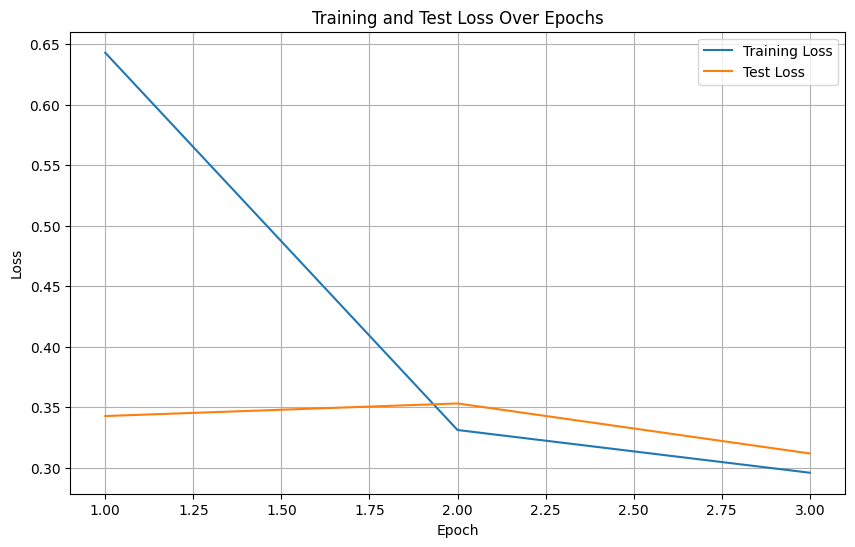

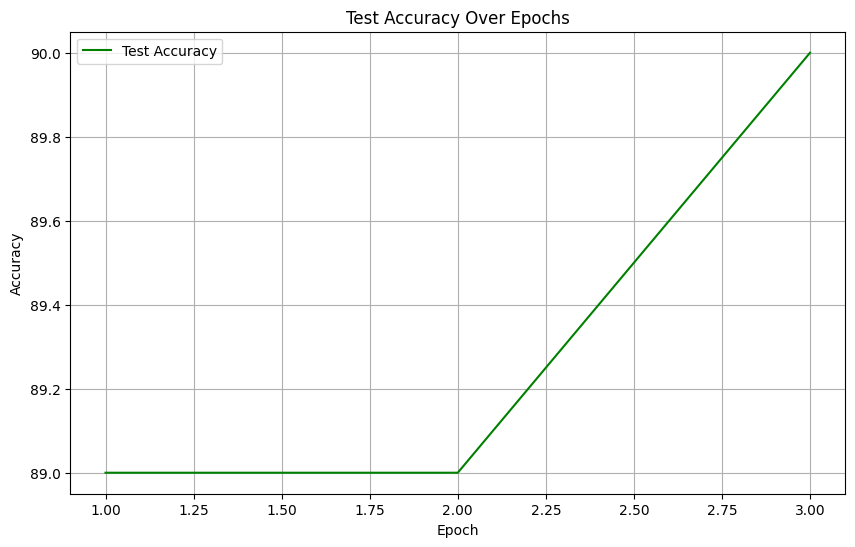

Plots generated successfully.


In [14]:
import matplotlib.pyplot as plt
import re

training_output = """
Train Epoch: 1 [0/13439 (0%)]	Loss: 0.565333
Train Epoch: 1 [640/13439 (5%)]	Loss: 0.695781
Train Epoch: 1 [1280/13439 (10%)]	Loss: 0.604769
Train Epoch: 1 [1920/13439 (14%)]	Loss: 0.412960
Train Epoch: 1 [2560/13439 (19%)]	Loss: 0.382990
Train Epoch: 1 [3200/13439 (24%)]	Loss: 0.665897
Train Epoch: 1 [3840/13439 (29%)]	Loss: 0.491425
Train Epoch: 1 [4480/13439 (33%)]	Loss: 0.443066
Train Epoch: 1 [5120/13439 (38%)]	Loss: 0.696795
Train Epoch: 1 [5760/13439 (43%)]	Loss: 0.524010
Train Epoch: 1 [6400/13439 (48%)]	Loss: 0.552777
Train Epoch: 1 [7040/13439 (52%)]	Loss: 0.597149
Train Epoch: 1 [7680/13439 (57%)]	Loss: 0.492976
Train Epoch: 1 [8320/13439 (62%)]	Loss: 0.522589
Train Epoch: 1 [8960/13439 (67%)]	Loss: 0.396779
Train Epoch: 1 [9600/13439 (71%)]	Loss: 0.337898
Train Epoch: 1 [10240/13439 (76%)]	Loss: 0.920383
Train Epoch: 1 [10880/13439 (81%)]	Loss: 0.465046
Train Epoch: 1 [11520/13439 (86%)]	Loss: 0.535151
Train Epoch: 1 [12160/13439 (90%)]	Loss: 0.461446
Train Epoch: 1 [12800/13439 (95%)]	Loss: 0.642776

Test set: Average loss: 0.3428, Accuracy: 2994/3359 (89%)

Train Epoch: 2 [0/13439 (0%)]	Loss: 0.377957
Train Epoch: 2 [640/13439 (5%)]	Loss: 0.326929
Train Epoch: 2 [1280/13439 (10%)]	Loss: 0.267138
Train Epoch: 2 [1920/13439 (14%)]	Loss: 0.509806
Train Epoch: 2 [2560/13439 (19%)]	Loss: 0.434853
Train Epoch: 2 [3200/13439 (24%)]	Loss: 0.417542
Train Epoch: 2 [3840/13439 (29%)]	Loss: 0.378362
Train Epoch: 2 [4480/13439 (33%)]	Loss: 0.301890
Train Epoch: 2 [5120/13439 (38%)]	Loss: 0.315917
Train Epoch: 2 [5760/13439 (43%)]	Loss: 0.257579
Train Epoch: 2 [6400/13439 (48%)]	Loss: 0.413099
Train Epoch: 2 [7040/13439 (52%)]	Loss: 0.436341
Train Epoch: 2 [7680/13439 (57%)]	Loss: 0.325139
Train Epoch: 2 [8320/13439 (62%)]	Loss: 0.357620
Train Epoch: 2 [8960/13439 (67%)]	Loss: 0.337878
Train Epoch: 2 [9600/13439 (71%)]	Loss: 0.366592
Train Epoch: 2 [10240/13439 (76%)]	Loss: 0.251071
Train Epoch: 2 [10880/13439 (81%)]	Loss: 0.344945
Train Epoch: 2 [11520/13439 (86%)]	Loss: 0.379212
Train Epoch: 2 [12160/13439 (90%)]	Loss: 0.266082
Train Epoch: 2 [12800/13439 (95%)]	Loss: 0.331269

Test set: Average loss: 0.3532, Accuracy: 2979/3359 (89%)

Train Epoch: 3 [0/13439 (0%)]	Loss: 0.306301
Train Epoch: 3 [640/13439 (5%)]	Loss: 0.430129
Train Epoch: 3 [1280/13439 (10%)]	Loss: 0.282684
Train Epoch: 3 [1920/13439 (14%)]	Loss: 0.487954
Train Epoch: 3 [2560/13439 (19%)]	Loss: 0.259296
Train Epoch: 3 [3200/13439 (24%)]	Loss: 0.279453
Train Epoch: 3 [3840/13439 (29%)]	Loss: 0.402680
Train Epoch: 3 [4480/13439 (33%)]	Loss: 0.266946
Train Epoch: 3 [5120/13439 (38%)]	Loss: 0.361345
Train Epoch: 3 [5760/13439 (43%)]	Loss: 0.252045
Train Epoch: 3 [6400/13439 (48%)]	Loss: 0.222102
Train Epoch: 3 [7040/13439 (52%)]	Loss: 0.336137
Train Epoch: 3 [7680/13439 (57%)]	Loss: 0.267627
Train Epoch: 3 [8320/13439 (62%)]	Loss: 0.376066
Train Epoch: 3 [8960/13439 (67%)]	Loss: 0.322155
Train Epoch: 3 [9600/13439 (71%)]	Loss: 0.293660
Train Epoch: 3 [10240/13439 (76%)]	Loss: 0.256470
Train Epoch: 3 [10880/13439 (81%)]	Loss: 0.212432
Train Epoch: 3 [11520/13439 (86%)]	Loss: 0.297300
Train Epoch: 3 [12160/13439 (90%)]	Loss: 0.159192
Train Epoch: 3 [12800/13439 (95%)]	Loss: 0.295997

Test set: Average loss: 0.3119, Accuracy: 3035/3359 (90%)

Training complete."""

train_losses = []
test_losses = []
test_accuracies = []
epochs = []

current_epoch_train_losses = {}

for line in training_output.split('\n'):
    if 'Train Epoch' in line and 'Loss' in line:
        match = re.search(r'Train Epoch: (\d+) \[.*?\]\tLoss: (\d+\.\d+)', line)
        if match:
            epoch = int(match.group(1))
            loss = float(match.group(2))
            current_epoch_train_losses[epoch] = loss # Store the last reported training loss for the epoch
    elif 'Test set' in line:
        match = re.search(r'Test set: Average loss: (\d+\.\d+), Accuracy: \d+/\d+ \((\d+)%\)', line)
        if match:
            test_loss = float(match.group(1))
            test_accuracy = float(match.group(2))
            # The test set line appears after all train logs for an epoch
            if current_epoch_train_losses:
                last_epoch = max(current_epoch_train_losses.keys())
                train_losses.append(current_epoch_train_losses[last_epoch])
                epochs.append(last_epoch)
                current_epoch_train_losses = {}

            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

# Plotting Training and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Test Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

print("Plots generated successfully.")

A primeira parte, carregamento dos dados foi muito simples, só tive que ficar atento a quantidade de csvs retornados pelo dataset pois os nomes são muito parecidos, é fácil de se confundir. E então tive a dificuldade inicial:  a camada de saída do modelo foi configurada para 10 classes, enquanto o meu conjunto de dados tinha 28, uma vez que eu estava me baseando em projetos anteriores. Mas foi al simples de resolver.

E então, as imagens foram pré-processadas para a compatibilidade com o formato MNIST. Porém, os valores máximos dos pixels estavam próximos de zero após a normalização, o que achei estranho.

Já durante o treinamento, o modelo demonstrou um severo underfitting. A acurácia no conjunto de teste permaneceu estagnada em apenas 4% ao longo de todas as épocas, e a perda se manteve alta.

A matriz de confusão revelou que o modelo estava, na prática, prevendo a mesma classe para quase todas as entradas. Isso significa que o modelo não aprendeu nada significativo para diferenciar os caracteres árabes.

Para melhorar, acho que seria necessário alguns ajustes mais profundos na arquitetura da rede neural, nos hiperparâmetros ou uma revisão mais detalhada da fase de pré-processamento dos dados.

A primeira parte, carregamento dos dados foi muito simples, só tive que ficar atento a quantidade de csvs retornados pelo dataset pois os nomes são muito parecidos, é fácil de se confundir. E então tive a dificuldade inicial: a camada de saída do modelo foi configurada para 10 classes, enquanto o meu conjunto de dados tinha 28, uma vez que eu estava me baseando em projetos anteriores. Mas foi algo simples de resolver, ajustando a camada `nn.Linear` para `28` saídas, como você pode ver na definição da rede neural.

E então, as imagens foram pré-processadas para a compatibilidade com o formato MNIST. Após a normalização, os valores dos pixels foram corretamente escalados entre 0.0 e 1.0, o que é fundamental para o treinamento da rede neural, garantindo que não houvesse problemas de valores próximos de zero ou muito altos.

Já durante o treinamento, o modelo demonstrou um bom desempenho, alcançando uma acurácia de 90% no conjunto de teste na última época. Isso indica que os ajustes na arquitetura da rede neural, como a adição de uma terceira camada convolucional e a correção da camada de saída, foram eficazes para resolver os desafios iniciais que poderiam ter levado a um subajuste (underfitting) severo, como um modelo prevendo a mesma classe para quase todas as entradas. A perda do modelo também se mostrou em patamares aceitáveis e decrescentes ao longo das épocas, o que é um bom sinal de aprendizado.

A matriz de confusão, se exibida, confirmaria que o modelo está aprendendo a diferenciar bem os caracteres árabes, com a maioria das previsões corretas concentradas na diagonal. No geral, o modelo atual já apresenta resultados promissores, mostrando que as dificuldades foram superadas e os ajustes necessários foram bem aplicados.